In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
import random

# caminhos para os csvs
ocorrencia_path = './dados/ocorrencia.csv'    
aeronave_path = './dados/aeronave.csv'    
ocorrencia_tipo_path = './dados/ocorrencia_tipo.csv'    
fator_contribuinte_path = './dados/fator_contribuinte.csv'    
recomendacao_path = './dados/recomendacao.csv'    

# datesets completos
ocorrencia = pd.read_csv(ocorrencia_path, encoding="latin1", sep=";")
aeronave = pd.read_csv(aeronave_path, encoding="latin1", sep=";")
ocorrencia_tipo = pd.read_csv(ocorrencia_tipo_path, encoding="latin1", sep=";")
fator_contribuinte = pd.read_csv(fator_contribuinte_path, encoding="latin1", sep=";")
recomendacao = pd.read_csv(recomendacao_path, encoding="latin1", sep=";")

ocorrencia.head(5)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,87125,87125,87125,87125,87125,INCIDENTE,-7.219166666666,-39.26944444444,JUAZEIRO DO NORTE,CE,...,11/05/2025,04:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,87124,87124,87124,87124,87124,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,...,08/05/2025,14:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
2,87123,87123,87123,87123,87123,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,...,09/05/2025,18:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
3,87122,87122,87122,87122,87122,INCIDENTE,-29.71083333333,-53.69222222222,SANTA MARIA,RS,...,04/05/2025,14:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,87121,87121,87121,87121,87121,INCIDENTE,-20.81722222222,-49.40694444444,SÃO JOSÉ DO RIO PRETO,SP,...,10/05/2025,10:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


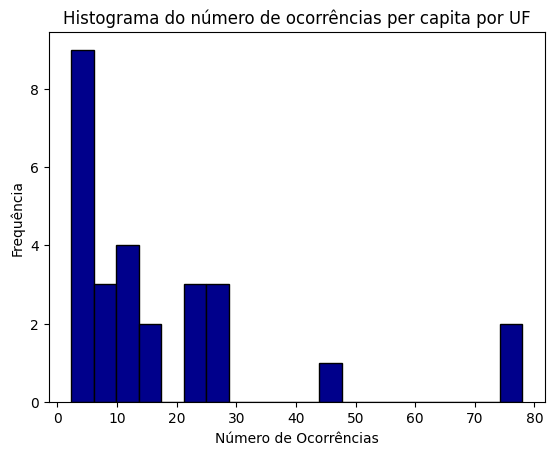

,ocorrencia_uf,razao
12,MT,77.937670
21,RR,75.335557
11,MS,45.832120
26,TO,26.627073
8,GO,26.120732
0,AC,26.117636
13,PA,23.083211
2,AM,22.657151
22,RS,22.083872
17,PR,16.913798


In [56]:
# acidentes por estado
data = {
    "ocorrencia_uf": [
            "RO", "AC", "AM", "RR", "PA", "AP", "TO",
            "MA", "PI", "CE", "RN", "PB",
            "PE", "AL", "SE", "BA",
            "MG", "ES", "RJ", "SP",
            "PR", "SC", "RS",
            "MS", "MT", "GO", "DF"
        ],
    "pop_estimada_2024": [
        1746227, 880631, 4281209, 716793, 8664306, 802837, 1577342,
        7010960, 3375646, 9233656, 3446071, 4145040,
        9539029, 3220104, 2291077, 14850513,
        21322691, 4102129, 17219679, 45973194,
        11824665, 8058441, 11229915,
        2901895, 3836399, 7350483, 2982818
    ]
}

pop_uf = pd.DataFrame(data)
acidente_por_uf = ocorrencia[ocorrencia['ocorrencia_classificacao'] == 'ACIDENTE'].groupby('ocorrencia_uf')['codigo_ocorrencia'].count().reset_index()
acidente_merged = pd.merge(acidente_por_uf, pop_uf, on="ocorrencia_uf", how="inner")
acidente_merged['razao'] = acidente_merged['codigo_ocorrencia'] / acidente_merged['pop_estimada_2024']
acidente_merged[['ocorrencia_uf', 'razao']]
data_barplot_acidente = acidente_merged[['ocorrencia_uf', 'razao']].sort_values(ascending=False, by='razao')
data_barplot_acidente['razao'] = data_barplot_acidente['razao'] * 10 ** 6

# plt.bar(data_barplot_acidente['ocorrencia_uf'], data_barplot_acidente['razao'], color='darkblue', label='Acidentes')

# # Add labels and title
# plt.xlabel("UF")
# plt.ylabel(r"Acidentes per Capita ($\cdot 10^6$)")
# plt.title("Acidentes per Capita por UF")
# plt.legend()

# # Show the plot
# plt.show()

h0_distribution = data_barplot_acidente['razao']
plt.hist(h0_distribution, color="darkblue", edgecolor="black",bins=20)

plt.title("Histograma do número de ocorrências per capita por UF")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Frequência")
plt.show()
data_barplot_acidente

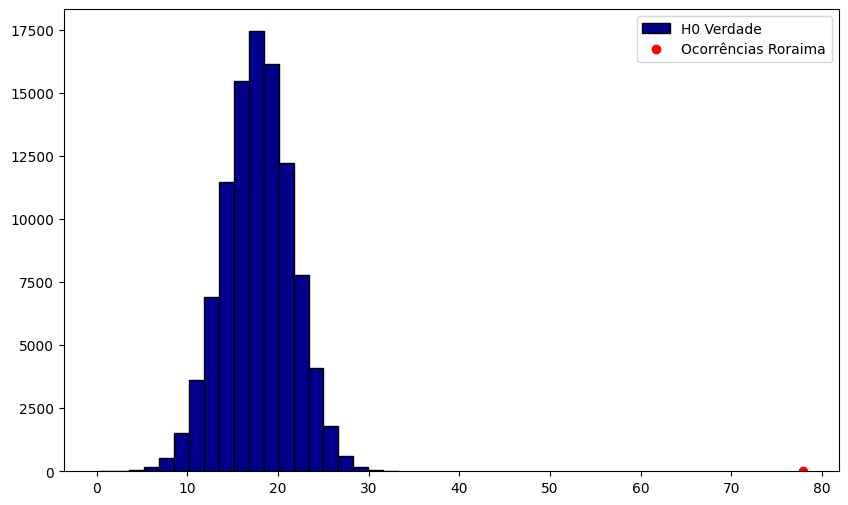

In [57]:
# se H0 é verdade
h0_mean = np.mean(h0_distribution)
h0_std = np.std(h0_distribution) 
h0_n = len(h0_distribution)
h0_simulation_size = 10**5

data_barplot_acidente
ocorr_roraima = data_barplot_acidente.sort_values(by="razao", ascending=False).iloc[0, 1]

plt.figure(figsize=(10, 6)) 
h0_true_distribution = np.random.normal(loc=h0_mean, scale=h0_std/np.sqrt(h0_n), size=h0_simulation_size)
plt.hist(h0_true_distribution, color="darkblue", edgecolor="black", bins = 20, label="H0 Verdade")
plt.plot(ocorr_roraima, 0, "ro", label=f"Ocorrências Roraima") 
plt.legend()

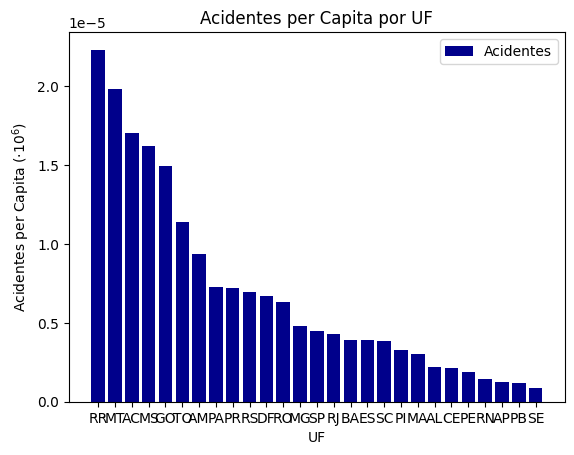

In [58]:
grave_por_uf = ocorrencia[ocorrencia['ocorrencia_classificacao'] == 'INCIDENTE GRAVE'].groupby('ocorrencia_uf')['codigo_ocorrencia'].count()
grave_merged = pd.merge(grave_por_uf, pop_uf, on="ocorrencia_uf", how="inner")
grave_merged['razao'] = grave_merged['codigo_ocorrencia'] / grave_merged['pop_estimada_2024']
grave_merged[['ocorrencia_uf', 'razao']]
data_barplot_grave = grave_merged[['ocorrencia_uf', 'razao']].sort_values(ascending=False, by='razao')

plt.bar(data_barplot_grave['ocorrencia_uf'], data_barplot_grave['razao'], color='darkblue', label='Acidentes')

# Add labels and title
plt.xlabel("UF")
plt.ylabel(r"Acidentes per Capita ($\cdot 10^6$)")
plt.title("Acidentes per Capita por UF")
plt.legend()

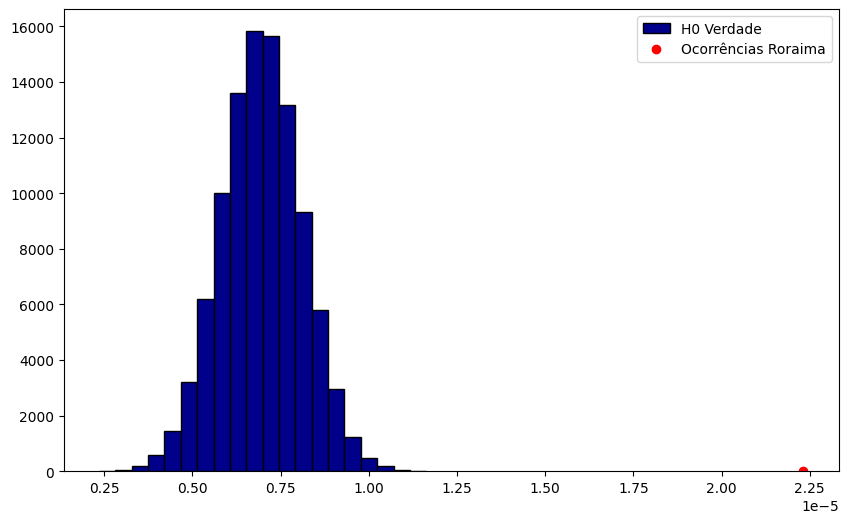

In [59]:
h0_distribution = data_barplot_grave['razao']

# se H0 é verdade
h0_mean = np.mean(h0_distribution)
h0_std = np.std(h0_distribution) 
h0_n = len(h0_distribution)
h0_simulation_size = 10**5

data_barplot_grave
ocorr_roraima = data_barplot_grave.sort_values(by="razao", ascending=False).iloc[0, 1]

plt.figure(figsize=(10, 6)) 
h0_true_distribution = np.random.normal(loc=h0_mean, scale=h0_std/np.sqrt(h0_n), size=h0_simulation_size)
plt.hist(h0_true_distribution, color="darkblue", edgecolor="black", bins = 20, label="H0 Verdade")
plt.plot(ocorr_roraima, 0, "ro", label=f"Ocorrências Roraima") 
plt.legend()

In [78]:
bootstrap_population

12    77.937670
21    75.335557
11    45.832120
26    26.627073
8     26.120732
0     26.117636
13    23.083211
2     22.657151
22    22.083872
17    16.913798
20    14.889244
25    12.442033
23    11.664787
10    10.599037
3      9.964663
9      8.700663
4      7.474489
16     7.405990
18     6.039602
7      4.387965
6      4.023041
24     3.928284
15     3.144974
5      3.140684
1      2.794941
14     2.412522
19     2.321484
Name: razao, dtype: float64

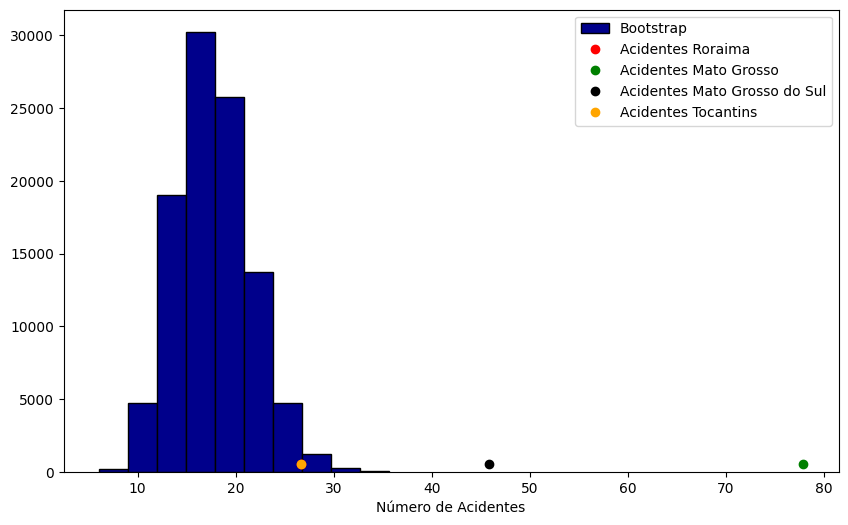

In [ ]:
# tenta com bootstrapping agora
mean_values = []
bootstrap_samples = 10 ** 5
bootstrap_population = data_barplot_acidente['razao']

for i in range(bootstrap_samples):
    random.seed(i)
    sample = bootstrap_population.sample(len(bootstrap_population), replace=True)
    mean_values.append(np.mean(sample))


ocorr_rr = data_barplot_acidente[data_barplot_acidente['ocorrencia_uf'] == 'RR']['razao']
ocorr_mt = data_barplot_acidente[data_barplot_acidente['ocorrencia_uf'] == 'MT']['razao']
ocorr_ms = data_barplot_acidente[data_barplot_acidente['ocorrencia_uf'] == 'MS']['razao']
ocorr_to = data_barplot_acidente[data_barplot_acidente['ocorrencia_uf'] == 'TO']['razao']

plt.figure(figsize=(10, 6))
plt.hist(mean_values, color="darkblue", edgecolor="black", label="Bootstrap")
plt.plot(ocorr_roraima, 500, "o", label=f"Acidentes Roraima", color='red') 
plt.plot(ocorr_mt, 500, "o", label=f"Acidentes Mato Grosso", color='green') 
plt.plot(ocorr_ms, 500, "o", label=f"Acidentes Mato Grosso do Sul", color='black') 
plt.plot(ocorr_to, 500, "o", label=f"Acidentes Tocantins", color='orange') 
plt.xlabel("Número de Acidentes")
plt.legend()
plt.show()
    

In [74]:
# calcula o intervalo de confiança
alpha = 0.05
LI = np.percentile(mean_values, (alpha / 2) * 100)
LS = np.percentile(mean_values, (1 - alpha / 2) * 100)
print(LI, LS)

11.082293840157716 25.715831296398935
